**Create a web app to predict the wine quality using KNN algorithm, then deploy it using streamlit and host it in its community cloud.**


In [1]:
# train_model.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle


In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/mansh/OneDrive/Desktop/AiDs Training/WineDetection/winequality-red.csv")
print("Data Shape:", df.shape)
print("First 5 rows:\n", df.head())


Data Shape: (1599, 12)
First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1   

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Optional: Check data types
print("\nData types:\n", df.dtypes)


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


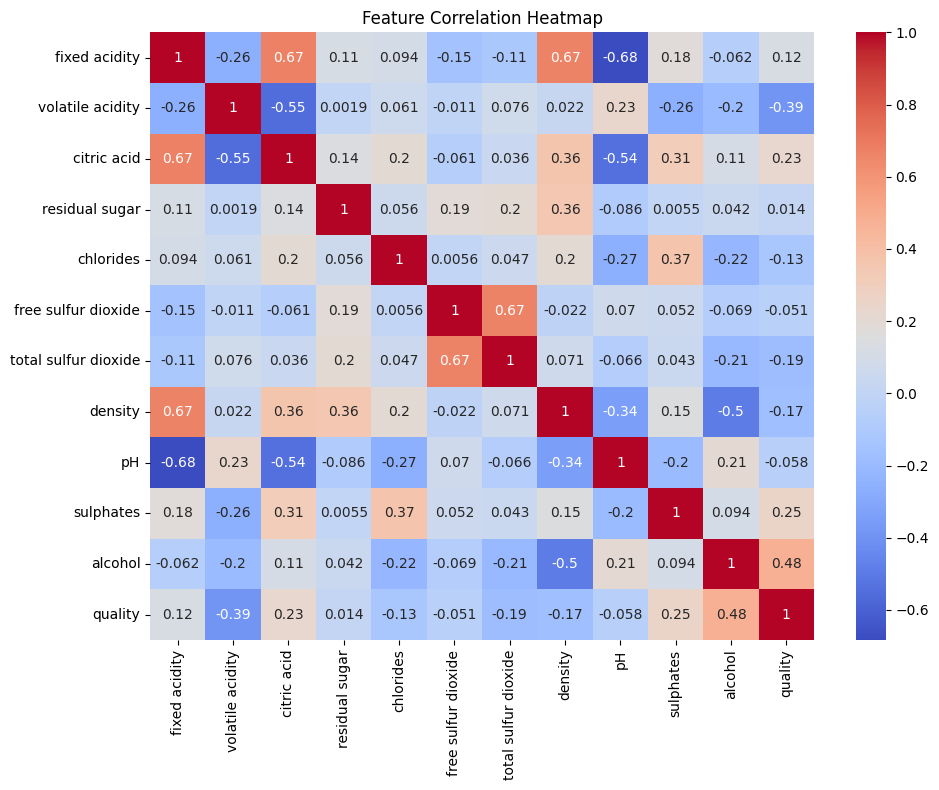

In [4]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("heatmap.png")  # Save the plot if needed


In [5]:
# Features and target
X = df.drop('quality', axis=1)
y = df['quality']


In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
y_binary = y.apply(lambda x: 1 if x >= 7 else 0)

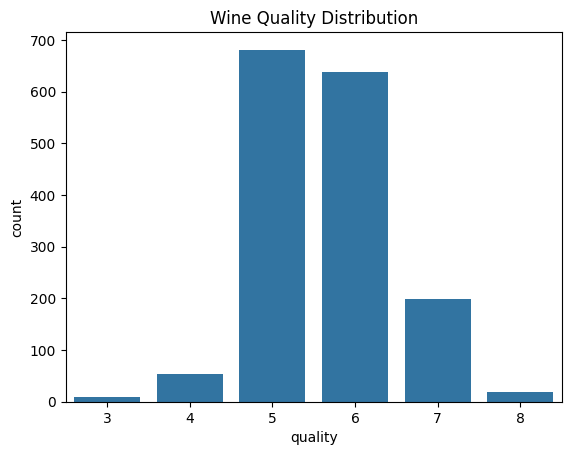

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Wine Quality Distribution")
plt.show()


In [9]:
print("Unique wine quality scores:", sorted(y.unique()))


Unique wine quality scores: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [11]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320

Accuracy Score: 0.85625


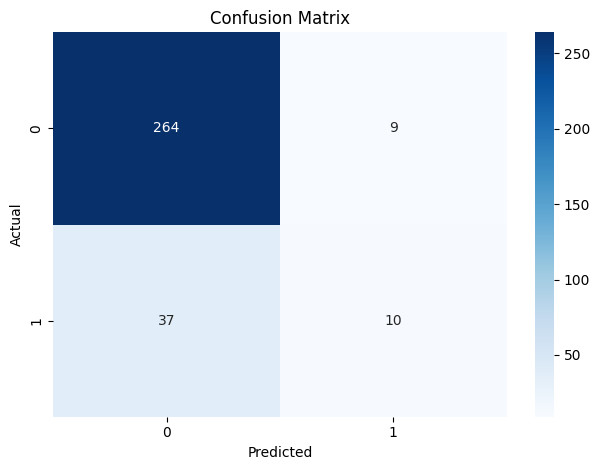

In [12]:
# Predict and evaluate
y_pred = knn.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")


In [13]:
acc = knn.score(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.8562


In [14]:
# Save the model
with open('wine_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
